<a href="https://colab.research.google.com/github/Muppidathe/ml_project/blob/master/standardscaling_minmaxscaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd

In [108]:
df=pd.read_csv('standard_scaler_dataset.csv')
df.head()

,Age,Salary,Experience
0,56,32695,3
1,46,78190,7
2,32,35258,6
3,60,117538,8
4,25,69504,27


# normallity check

<Axes: xlabel='Age', ylabel='Count'>

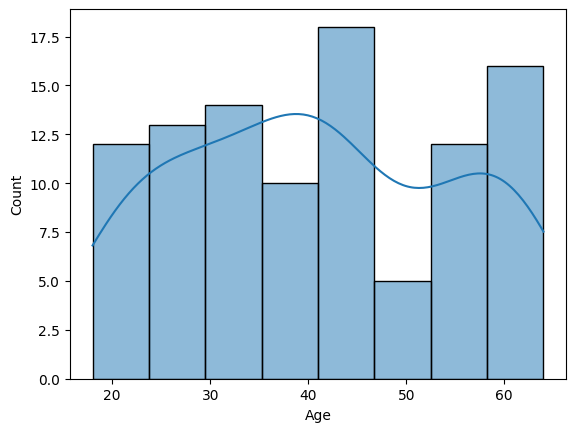

In [109]:
import seaborn as sns
sns.histplot(data=df,x=df['Age'],kde=True)

In [110]:
from scipy.stats import anderson
res=anderson(df['Age'],dist="norm")
if res.statistic<res.critical_values[2]:
  print('normally distributed')
else:
  print('not-normally distributed')

not-normally distributed


<Axes: xlabel='Salary', ylabel='Count'>

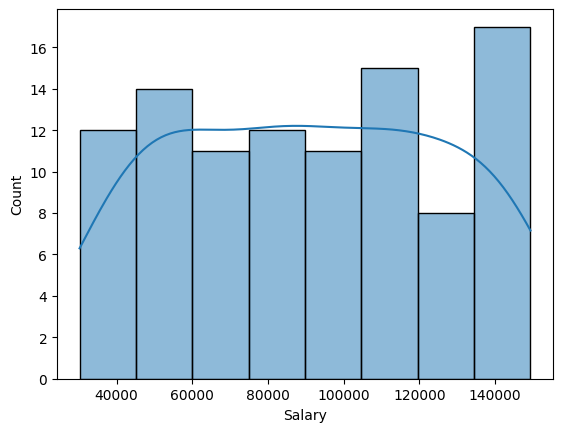

In [111]:
import seaborn as sns
sns.histplot(data=df,x=df['Salary'],kde=True)

In [112]:
from scipy.stats import anderson
res=anderson(df['Salary'],dist="norm")
if res.statistic<res.critical_values[2]:
  print('normally distributed')
else:
  print('not-normally distributed')

not-normally distributed


<Axes: xlabel='Experience', ylabel='Count'>

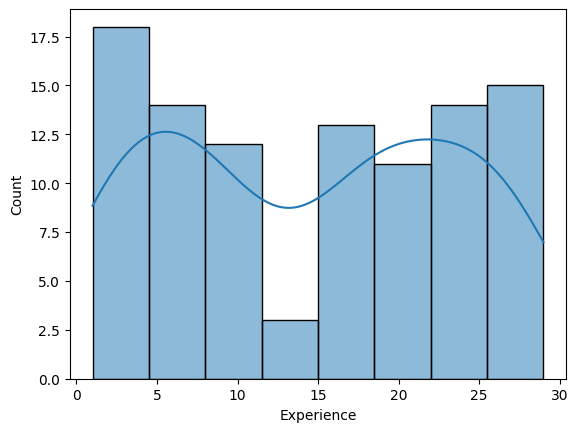

In [113]:
import seaborn as sns
sns.histplot(data=df,x=df['Experience'],kde=True)

In [114]:
from scipy.stats import anderson
res=anderson(df['Experience'],dist="norm")
if res.statistic<res.critical_values[2]:
  print('normally distributed')
else:
  print('not-normally distributed')

not-normally distributed


# linearity check

<Axes: xlabel='Age', ylabel='Experience'>

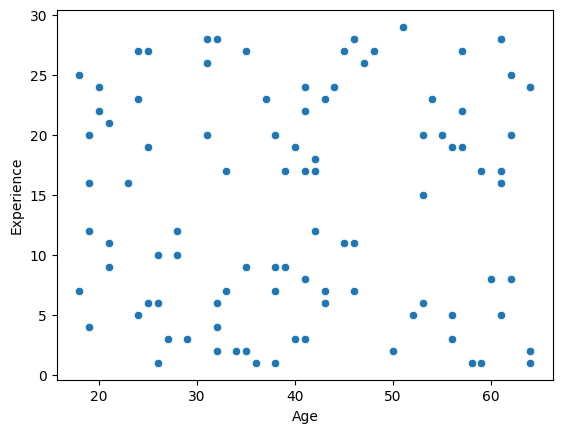

In [115]:
import seaborn as sns
sns.scatterplot(data=df,x=df['Age'],y=df['Experience'])

<Axes: xlabel='Salary', ylabel='Experience'>

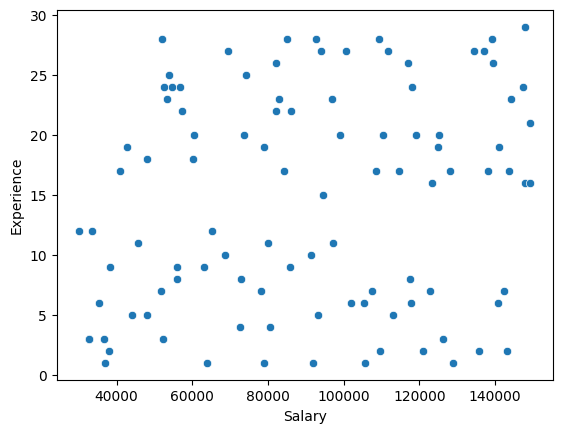

In [116]:
import seaborn as sns
sns.scatterplot(data=df,x=df['Salary'],y=df['Experience'])

In [117]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:2]
y=df.iloc[:,2]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [118]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly=PolynomialFeatures(degree=3)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)
model=LinearRegression()
model.fit(x_train_poly,y_train)

LinearRegression()

In [119]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
y_pred=model.predict(x_train_poly)
smse_train=mean_squared_error(y_train,y_pred)/np.var(y_train)
r2_train=r2_score(y_train,y_pred)
y_pred=model.predict(x_test_poly)
smse_test=mean_squared_error(y_test,y_pred)/np.var(y_test)
r2_test=r2_score(y_test,y_pred)
print('smse_train ',smse_train)
print('smse_test ',smse_test)
print('r2_train ',r2_train)
print('r2_test ',r2_test)
if (r2_train-r2_test)>.2:
  print("over fit")
elif (r2_train-r2_test)< -.2:
  print('under fit')
else:
  print("goot fit")

smse_train  0.815062010429416
smse_test  1.0921611391918788
r2_train  0.18493798957058416
r2_test  -0.09216113919187885
over fit


# after scaling(standard scaling is for normally distributed data)


In [120]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_poly)
x_test_scaled=scaler.transform(x_test_poly)

In [121]:
model_s=LinearRegression()
model_s.fit(x_train_scaled,y_train)

LinearRegression()

In [122]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
y_pred=model_s.predict(x_train_scaled)
smse_train=mean_squared_error(y_train,y_pred)/np.var(y_train)
r2_train=r2_score(y_train,y_pred)
y_pred=model_s.predict(x_test_scaled)
smse_test=mean_squared_error(y_test,y_pred)/np.var(y_test)
r2_test=r2_score(y_test,y_pred)
print('smse_train ',smse_train)
print('smse_test ',smse_test)
print('r2_train ',r2_train)
print('r2_test ',r2_test)
if (r2_train-r2_test)>.2:
  print("over fit")
elif (r2_train-r2_test)< -.2:
  print('under fit')
else:
  print("goot fit")


smse_train  0.8049049224949313
smse_test  1.0993318446339393
r2_train  0.19509507750506871
r2_test  -0.09933184463393929
over fit


# After minmaxscaling(normalization is for non-normally distributed data)

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_norm=scaler.fit_transform(x_train_poly)
x_test_norm=scaler.transform(x_test_poly)

In [124]:
model_n=LinearRegression()
model_n.fit(x_train_norm,y_train)

LinearRegression()

In [125]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
y_pred=model_n.predict(x_train_norm)
smse_train=mean_squared_error(y_train,y_pred)/np.var(y_train)
r2_train=r2_score(y_train,y_pred)
y_pred=model_n.predict(x_test_norm)
smse_test=mean_squared_error(y_test,y_pred)/np.var(y_test)
r2_test=r2_score(y_test,y_pred)
print('smse_train ',smse_train)
print('smse_test ',smse_test)
print('r2_train ',r2_train)
print('r2_test ',r2_test)
if (r2_train-r2_test)>.2:
  print("over fit")
elif (r2_train-r2_test)< -.2:
  print('under fit')
else:
  print("goot fit")

smse_train  0.8049049224949315
smse_test  1.0993318446339315
r2_train  0.1950950775050685
r2_test  -0.09933184463393152
over fit
